In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown


fname = 'Jaffe_test_no_perturber_10000_out.txt'

N = 10000
M = 1
m = M/N
Rs = 1

rho_0 = M / (4 * np.pi * (Rs)**3)

## Fetch the data

In [2]:
data = pd.read_csv(fname, header=None).to_numpy()

./treecode in=../../Project/Jaffe_test_no_perturber_10000.txt out=../../Project/Jaffe_test_no_perturber_10000_out.txt dtime=0.1 eps=0.03 theta=0.01 tstop=20 dtout=0.1 > system_infos.txt


In [3]:
# take only the paired components every 3N+3 rows
# index 2: times
#index i: masses
# index i + N : positions
#index i + 2N : velocities

times = data[2::(3 * N + 3)].astype(float)

m = {}

for i in range(3, N + 3): # start from index==3 because we care about m_s, x_s and v_s 
    
    m[f"{i}_ms"]= data[i::(3 * N + 3)]
    m[f"{i}_xs"]= data[(i + N)::(3 * N + 3)]
    m[f"{i}_vs"]= data[(i + 2 * N)::(3 * N + 3)]

In [4]:
m_data = {} # define a dictionary to order variables

for j in range(3, N + 3):

    m_data[f"{j - 3}_ms"] = np.array([m[f"{j}_ms"][i][0].split() for i in range(0, len(m[f"{j}_ms"]))]).astype(float)
    m_data[f"{j - 3}_xs"] = np.array([m[f"{j}_xs"][i][0].split() for i in range(0, len(m[f"{j}_xs"]))]).astype(float)
    m_data[f"{j - 3}_vs"] = np.array([m[f"{j}_vs"][i][0].split() for i in range(0, len(m[f"{j}_vs"]))]).astype(float)

In [5]:
times_plot = np.hstack(times) # create array from the previous times

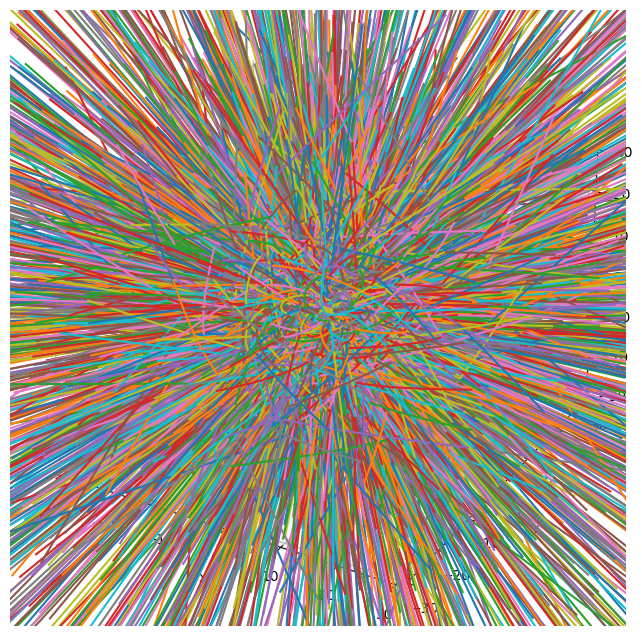

In [6]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(8,8))

for i in range(0, N):

    ax.plot(m_data[f"{i}_xs"][:, 0], m_data[f"{i}_xs"][:, 1], m_data[f"{i}_xs"][:, 2], label=f"{i}th particle", linestyle='-')

    
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)
ax.set_zlim(-30, 30)

plt.show()

## Animation

In [7]:
my_x = np.zeros((N, len(times)))
my_y = np.zeros((N, len(times)))
my_z = np.zeros((N, len(times)))

for i in range(0,N):
    for j in range(0,len(times)):
        my_x[i,j] = m_data[f"{i}_xs"][j][0]
        my_y[i,j] = m_data[f"{i}_xs"][j][1]
        my_z[i,j] = m_data[f"{i}_xs"][j][2]

  0%|          | 0/601 [00:00<?, ?it/s]

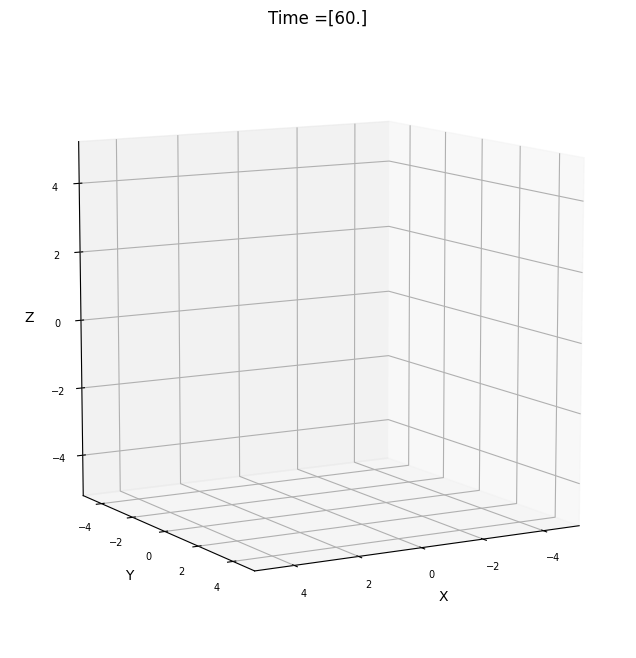

In [8]:
from tqdm.notebook import tqdm
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

#plot------------------------------------------------------------------------------

fig = plt.figure(figsize = (8,8))
ax  = fig.add_subplot(projection='3d')
ax.set_aspect('equal')

ax.view_init(elev=10, azim=60)
ax.set_xlim(-5,+5)
ax.set_ylim(-5,+5)
ax.set_zlim(-5,+5)


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.tick_params(axis='x', labelsize=7)
ax.tick_params(axis='y', labelsize=7)
ax.tick_params(axis='z', labelsize=7)


#animation--------------------------------------------------------------------------------
scatters, = ax.plot([], [], [], 'o', markersize='0.8', alpha=0.3)


def init():
    scatters.set_data([], [])
    scatters.set_3d_properties([])
    return scatters,

def animate_time(i): 
    scatters.set_data(my_x[:,i], my_y[:,i])
    scatters.set_3d_properties(my_z[:,i])
    ax.set_title('Time =' + str(np.round((np.array(times))[i])))
        
    return scatters,


num_frames = len(times)
animazione = FuncAnimation(fig, animate_time, frames=tqdm(range(len(times))), interval=100, init_func=init) #frames = num_frames interval =100

theta_ = np.linspace(0,2*np.pi,1000)

writergif = animation.PillowWriter(fps=10)
#writer = animation.PillowWriter(fps=30)
#animazione.save('plummer_sphere.gif', writer = 'ffmpeg', dpi=30)
animazione.save(f'Jaffe_{N}_test.gif', writer = writergif)
#plt.show()

plt.rcParams['animation.html'] = 'html5'
#animazione

##  Lagrangian radii

In [9]:
r_t = {}  # set an array where to store rays at different ts

for i in range(0, N):  
    
    r_t[f"{i}"] = np.sqrt(m_data[f"{i}_xs"][:, 0]**2 + m_data[f"{i}_xs"][:, 1]**2 + m_data[f"{i}_xs"][:, 2]**2)

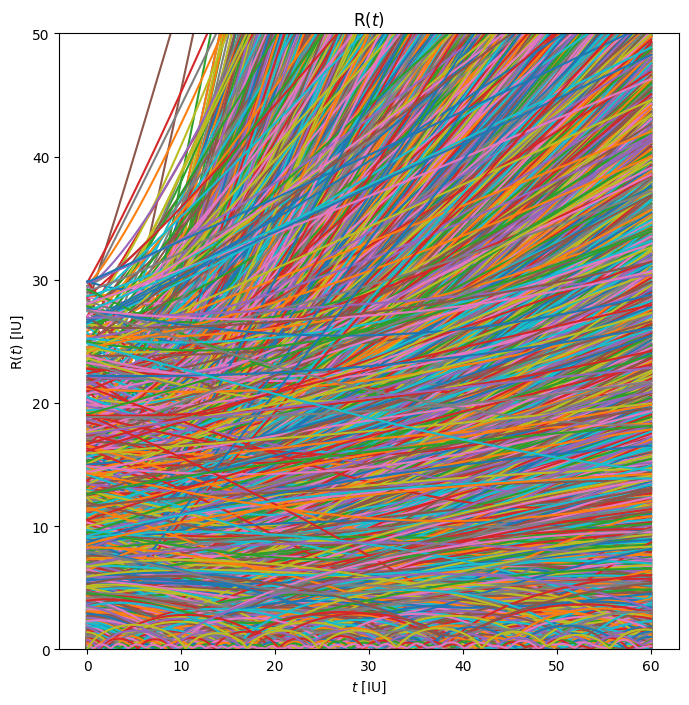

In [10]:
plt.figure(figsize = (8,8))

for i in range(0, N-1):

    plt.plot(times_plot, r_t[f"{i}"][:], label = f"{i} mass")

plt.xlabel("$t$ [IU]")
plt.ylabel("$\mathrm{R}(t)$ [IU]")
plt.title("$\mathrm{R}(t)$")
plt.ylim(0, 50)
plt.show()

In [11]:
x_cm = np.zeros(len(times_plot))
y_cm = np.zeros(len(times_plot))
z_cm = np.zeros(len(times_plot))

for i in range(0,len(times_plot)):
    x_cm[i] = np.mean(my_x[i])
    y_cm[i] = np.mean(my_y[i])
    z_cm[i] = np.mean(my_z[i])
    

Now I plot the trajectory of the center of mass of the system

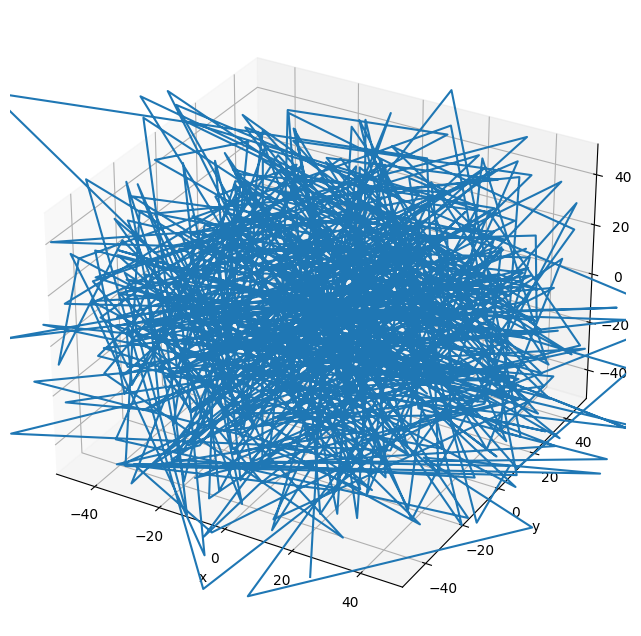

In [12]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(8,8))

ax.plot(x_cm, y_cm, z_cm, label=f"CM", linestyle='-')

    
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)
ax.set_zlim(-50, 50)

plt.show()

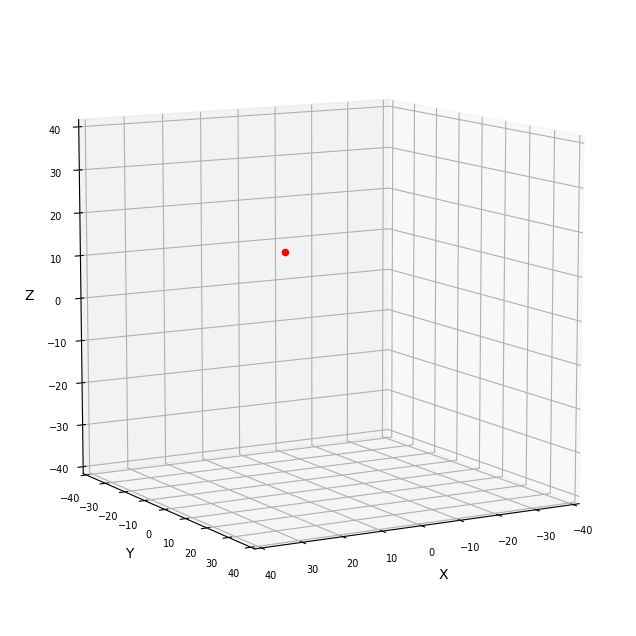

In [13]:
#plot------------------------------------------------------------------------------

fig = plt.figure(figsize = (8,8))
ax  = fig.add_subplot(projection='3d')
ax.set_aspect('equal')

ax.view_init(elev=10, azim=60)
ax.set_xlim(-40, +40)
ax.set_ylim(-40, +40)
ax.set_zlim(-40, +40)


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.tick_params(axis='x', labelsize=7)
ax.tick_params(axis='y', labelsize=7)
ax.tick_params(axis='z', labelsize=7)


#animation--------------------------------------------------------------------------------

# Initialize the plot with the initial center of mass position
scatter = ax.scatter([x_cm[0]], [y_cm[0]], [z_cm[0]], c='r', marker='o')

# Function to update the plot for each frame in the animation
def update(frame):
    scatter._offsets3d = ([x_cm[frame]], [y_cm[frame]], [z_cm[frame]])
    return scatter,

# Create the animation
ani = FuncAnimation(fig, update, frames=len(times_plot), interval=100, blit=True)

# Save the animation as a GIF
ani.save('center_of_mass_animation.gif', writer='pillow')

plt.show()

In [14]:
lagrangian_radii[60][0]

NameError: name 'lagrangian_radii' is not defined

In [15]:
# Print or use lagrangian_radii dictionary as needed
for percentage, radii_data in lagrangian_radii.items():
    print(f'Lagrangian Radius ({percentage}% of mass):')
    for t, radius in radii_data:
        print(f'Time: {t}, Radius: {radius}')

NameError: name 'lagrangian_radii' is not defined